逻辑回归，即 Logistic Regression，实际上是处理分类问题。  
对于下面这个经典的 MNIST 数据集  
![](https://pic.imgdb.cn/item/6583f1c2c458853aefee42fe.jpg)  
若采用之前的线性回归模型或是回归模型，则有一个问题：  
数字 7 和 9 在书写上十分相近，那么输出上应该也相近，但是按照数字输出的话，7 和 9 之间还隔了 8 ，因此直接采用回归模型进行拟合并不好。  
而逻辑分析则是，不是输出一个数，而是输出一个分布，即输出：  
$$P\left\{ y = 1 \right\} = k_i, i = 1, 2, 3...9$$  
这样只需要取这个图片最有可能的值即可。  
要导入 MNIST 数据集可用下面的语句：

In [8]:
import torchvision
#train_set = torchvision.datasets.MNIST(root='./dataset/mnist', train=True, download=True)
#test_set = torchvision.datasets.MNIST(root='./dataset/mnist', train=False, download=True)

### 回归任务与分类任务的区别
对于回归任务，考虑  
| x学习时长      | y期望分数 |
| :-----------: | :-----------: |
| 1      | 2       |
| 2   | 4        |
| 3   | 6        |  

输入学习时长，通过回归得到的是具体的考试分数。而对于分类任务，考虑  

| x学习时长      | y通过/不通过 |
| :-----------: | :-----------: |
| 1      | 0       |
| 2   | 0        |
| 3   | 1        | 

即分类任务中，我们计算$P(\hat{y} = 1)$ 以及 $P(\hat{y} = 0)$ 的概率，实际上就是 $\hat{y}$ 的分布。  
由于这里 y 的取值只有两个，属于二分类，因此只需要计算$P(\hat{y} = 1)$的值，即可计算出$P(\hat{y} = 0)$  
还有个不同在于，由于概率在 0，1 之间，因此计算出来的概率也应该在0 - 1，需要有个函数完成  
$\hat{y} \in [-\infty,+\infty] \rightarrow P(\hat{y} = 1) \in [0,1]$  
完成这项任务的函数叫 Sigmoid 函数，其中以 Logistic 函数最为广泛，因此也常用将 sigmoid 默认为 logistic。logistic 函数定义如下：  
$$\sigma(x)=\frac1{1+e^{-x}}$$  
图像如下：  
![](https://pic.imgdb.cn/item/6583faeac458853aef074157.jpg)

逻辑回归的计算图如下：  
![](https://pic.imgdb.cn/item/6583fc02c458853aef0a5183.jpg)

### 损失函数
不同于回归分析，这里$\hat{y} = P(class = 1), 1 - \hat{y} = P(class = 0)$  
对于两个分布，要计算两个分布之间的距离，或者说差值，对于二分类逻辑回归问题，通常采用交叉熵（Binary Cross Entropy，BCE）定义为：  
$$loss=-(y\log\widehat{y}+(1-y)\log(1-\widehat{y}))$$  
当 y = 1时，$\hat{y}$越接近1，最终 loss 越接近 0，与损失函数定义相吻合；  
由于需要 loss 越小越好，因此添加负号

下面给出代码实现

In [9]:
import torch
import torch.nn.functional as F

x_data = torch.Tensor([[1],[2],[3]])
y_data = torch.Tensor([[0],[0],[1]])

In [10]:
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
    
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegressionModel()

In [11]:
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

/Users/liyang/miniconda3/envs/d2l/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [12]:
epoch_list = []
loss_list = []

for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_list.append(epoch)
    loss_list.append(loss.item())

/Users/liyang/miniconda3/envs/d2l/lib/python3.9/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


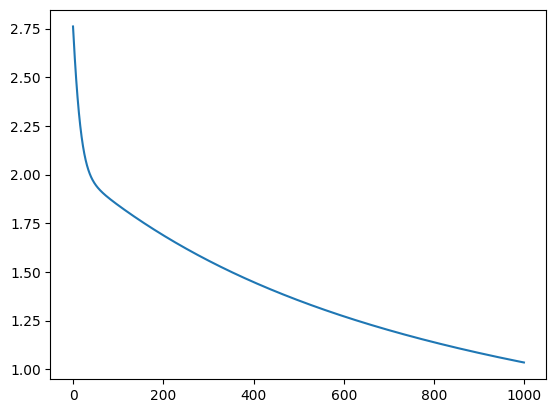

In [13]:
import matplotlib.pyplot as plt
plt.plot(epoch_list, loss_list)
plt.show()

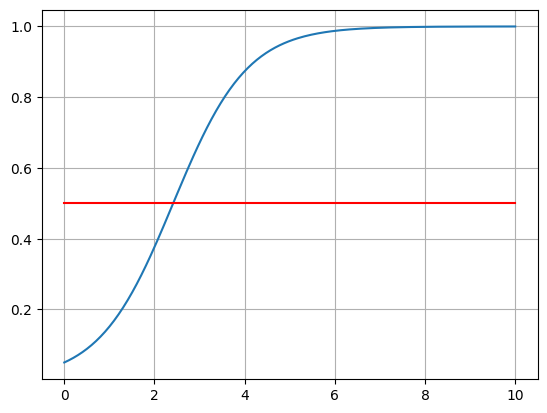

In [14]:
import numpy as np
x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200,1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x, y)
plt.plot([0,10], [0.5, 0.5], c='r')
plt.grid()
plt.show()

可以看出学习时间为 2.5 小时，通过考试的概率为 50%，其实是来自于数据集，当时间为 2；不通过，时间为3，通过